# Predicting House Prices : Regression

### The Boston Housing Price  Dataset

In [28]:
import keras
from keras import layers
from keras import models
from keras.datasets import boston_housing
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

### Data size

In [3]:
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


### We have 404 training samples and 102 test samples, each with 13 numerical features, such as per captia crime rate, average number of rooms per dwelling, accesibilty to highways and so on.

### the targets are the median values of owner-occupied homes, in thousands of dollars

In [4]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

- It would be problematic to feed into a neural network values that all takes widly different ranges.
- The network might be able to automatically adapt to such heterogeneous data, but it would definitely make learning more difficult.
- Best practise for such data is feature-wise normalization: for each feature in the input data, you subtract the mean of the feature and divide by the standard deviation, so that the feature is centered around 0 and has a unit standard deviation.

### Normalizing the data

In [5]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

- Note that the quantities used for normalizing the test data are computed using the training data. You should never use in your workflow any quantity computed on the test data, even for something as simple as data normalization

### Building the network

In [9]:
adam = keras.optimizers.Adam(lr=0.001)
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer=adam, loss='mse', metrics = ['mae'])
    return model

## K-fold Validation

In [15]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [16]:
num_val_samples

101

### Prepare the validation data

In [17]:
for i in range(k):
    print('Processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    print(i * num_val_samples,  (i+1) * num_val_samples)
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i +1) * num_val_samples:]], axis =0 )
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i+1)* num_val_samples:]], axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold # 0
0 101
Processing fold # 1
101 202
Processing fold # 2
202 303
Processing fold # 3
303 404


### Running with num_epochs=100 yeilds the following results

In [20]:
print('all scores->', all_scores)
print(np.mean(all_scores))

all scores-> [2.1311631509573155, 2.3743179552625904, 2.504257512564706, 2.3672416794418107]
2.3442450745566057


### Saving the validation logs at each fold

In [32]:
num_epochs = 200
all_mae_histories = []
for i in range(k):
    print('Processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    print(i * num_val_samples,  (i+1) * num_val_samples)
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i +1) * num_val_samples:]], axis =0 )
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i+1)* num_val_samples:]], axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    
    mae_history = history.history['mean_absolute_error']
    all_mae_histories.append(mae_history)

Processing fold # 0
0 101
Processing fold # 1
101 202
Processing fold # 2
202 303
Processing fold # 3
303 404


In [33]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

## Plotting validation scores

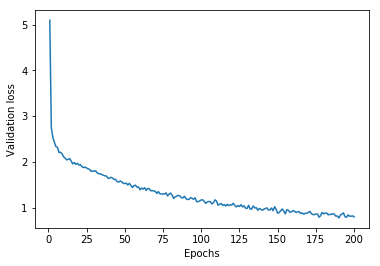

In [34]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.show()

## Plotting validation scores exculding the first 10 data points

Text(0,0.5,'Validation mae')

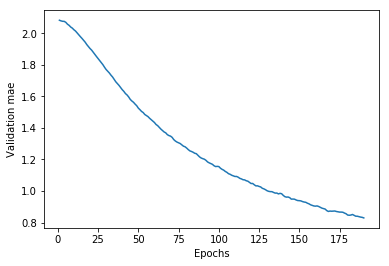

In [35]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor+point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation mae')

## Training the final model

In [37]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size = 16, verbose =0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 3ms/step


In [38]:
test_mae_score

2.711620097066842